In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)

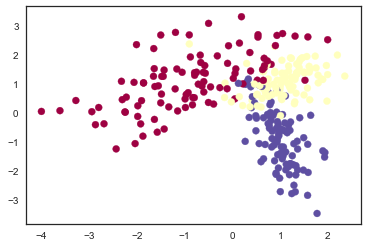

In [16]:
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_informative=2, n_repeated=0, n_redundant=0, n_clusters_per_class=1, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

# One-vs-Rest

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[20,  6,  0],
       [ 2, 21,  3],
       [ 0,  2, 21]])

In [18]:
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % metrics.recall_score(y_test, y_pred, average="macro"))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.826667
Precision: 0.836076
Recall: 0.829989
F1-score: 0.830196


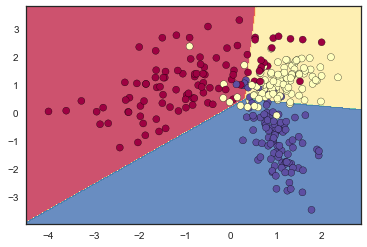

In [19]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')

# Multinomial

In [20]:
model = LogisticRegression(multi_class="multinomial", solver="saga", random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[21,  5,  0],
       [ 1, 23,  2],
       [ 0,  2, 21]])

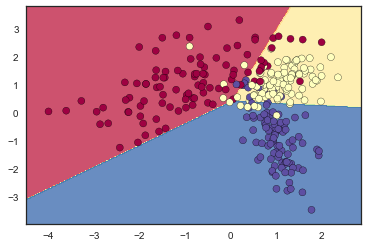

In [21]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')

In [22]:
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % metrics.recall_score(y_test, y_pred, average="macro"))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.866667
Precision: 0.878085
Recall: 0.868450
F1-score: 0.869824
